In [23]:
import category_encoders as ce
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Encoding Using Python Functions

###  ordinal encoding

In [16]:
def ordinal_encoder(data, column_name, mapping):
    return [{**row, column_name: mapping.get(row[column_name], -1)} for row in data]

train_data = [
    {'Degree': 'High school'}, {'Degree': 'Masters'}, {'Degree': 'Diploma'},
    {'Degree': 'Bachelors'}, {'Degree': 'Bachelors'}, {'Degree': 'Masters'},
    {'Degree': 'Phd'}, {'Degree': 'High school'}, {'Degree': 'High school'}
]
degree_mapping = {'None': 0, 'High school': 1, 'Diploma': 2, 
                  'Bachelors': 3, 'Masters': 4, 'Phd': 5}

encoded_data = ordinal_encoder(train_data, 'Degree', degree_mapping)




In [17]:
#  results
print("Original Data:")
print(train_data)

print("\nEncoded Data:")
print(encoded_data)

Original Data:
[{'Degree': 'High school'}, {'Degree': 'Masters'}, {'Degree': 'Diploma'}, {'Degree': 'Bachelors'}, {'Degree': 'Bachelors'}, {'Degree': 'Masters'}, {'Degree': 'Phd'}, {'Degree': 'High school'}, {'Degree': 'High school'}]

Encoded Data:
[{'Degree': 1}, {'Degree': 4}, {'Degree': 2}, {'Degree': 3}, {'Degree': 3}, {'Degree': 4}, {'Degree': 5}, {'Degree': 1}, {'Degree': 1}]


###   One-Hot Encoding

In [20]:
data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hydrabad', 'Chennai', 'Bangalore', 'Delhi', 'Hydrabad', 'Bangalore', 'Delhi']})

def one_hot_encoder(data, column):
    encoded_data = pd.get_dummies(data, columns=[column], drop_first=False)
    return encoded_data
encoded_data = one_hot_encoder(data, 'City')

encoded_data = encoded_data.astype(int)
data



,City
0,Delhi
1,Mumbai
2,Hydrabad
3,Chennai
4,Bangalore
5,Delhi
6,Hydrabad
7,Bangalore
8,Delhi


In [21]:

print(encoded_data)


   City_Bangalore  City_Chennai  City_Delhi  City_Hydrabad  City_Mumbai
0               0             0           1              0            0
1               0             0           0              0            1
2               0             0           0              1            0
3               0             1           0              0            0
4               1             0           0              0            0
5               0             0           1              0            0
6               0             0           0              1            0
7               1             0           0              0            0
8               0             0           1              0            0


### Dummy Encoding

In [2]:
data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore', 'Delhi', 'Hyderabad']})
def one_hot_encode(data, column, drop_first=True):
    unique_values = sorted(set(data[column]))
    encoded_data = {
        f"{column}_{value}": [x == value for x in data[column]] 
        for idx, value in enumerate(unique_values) if not (drop_first and idx == 0)
    }
    return pd.concat([data.drop(columns=[column]), pd.DataFrame(encoded_data)], axis=1)
data_encoded = one_hot_encode(data, 'City', drop_first=True)

data


,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad


In [3]:
# Output the encoded DataFrame
print(data_encoded)

   City_Chennai  City_Delhi  City_Hyderabad  City_Mumbai
0         False        True           False        False
1         False       False           False         True
2         False       False            True        False
3          True       False           False        False
4         False       False           False        False
5         False        True           False        False
6         False       False            True        False


### Effect Encoding

In [4]:
data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore', 'Delhi', 'Hyderabad']})

def sum_encoder(data, column):
    categories = sorted(data[column].unique())
    encoded_data = pd.DataFrame({
        f"{column}_{cat}": [
            1 if val == cat else -1 if val == categories[-1] else 0
            for val in data[column]
        ]
        for cat in categories[:-1]
    })
    return pd.concat([data, encoded_data], axis=1).drop(columns=[column])
encoded_data = sum_encoder(data, 'City')

data

,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad


In [5]:

print(encoded_data)


   City_Bangalore  City_Chennai  City_Delhi  City_Hyderabad
0               0             0           1               0
1              -1            -1          -1              -1
2               0             0           0               1
3               0             1           0               0
4               1             0           0               0
5               0             0           1               0
6               0             0           0               1


### Hash Encoder

In [6]:
data = pd.DataFrame({'Month': ['January', 'April', 'March', 'April', 'February', 'June', 'July', 'June', 'September']})
def hash_encoder(data, column, n_components):
    def hash_value(value, n):
        return [1 if (hash(value) + i) % n == 0 else 0 for i in range(n)]

    encoded_data = pd.DataFrame(
        [hash_value(value, n_components) for value in data[column]],
        columns=[f"{column}_hash_{i}" for i in range(n_components)]
    )
    return pd.concat([data, encoded_data], axis=1).drop(columns=[column])
encoded_data = hash_encoder(data, 'Month', 6)

data


,Month
0,January
1,April
2,March
3,April
4,February
5,June
6,July
7,June
8,September


In [7]:
# Output the result
print(encoded_data)


   Month_hash_0  Month_hash_1  Month_hash_2  Month_hash_3  Month_hash_4  \
0             0             0             0             1             0   
1             0             0             0             0             0   
2             0             0             1             0             0   
3             0             0             0             0             0   
4             0             0             0             0             1   
5             0             0             0             0             0   
6             0             0             0             1             0   
7             0             0             0             0             0   
8             0             0             0             1             0   

   Month_hash_5  
0             0  
1             1  
2             0  
3             1  
4             0  
5             1  
6             0  
7             1  
8             0  


### Target Encoding

In [10]:
data = [
    {'class': 'A', 'Marks': 50},
    {'class': 'B', 'Marks': 30},
    {'class': 'C', 'Marks': 70},
    {'class': 'B', 'Marks': 80},
    {'class': 'C', 'Marks': 45},
    {'class': 'A', 'Marks': 97},
    {'class': 'A', 'Marks': 80},
    {'class': 'A', 'Marks': 68}
]
def target_encoder(data, target_col, encode_col):
    class_means = {cls: sum(row[target_col] for row in data if row[encode_col] == cls) / 
                   sum(1 for row in data if row[encode_col] == cls) for cls in set(row[encode_col] for row in data)}
    for row in data:
        row['class_encoded'] = class_means[row[encode_col]]
    return data
encoded_data = target_encoder(data, 'Marks', 'class')




In [11]:
# Display the Result
for row in encoded_data:
    print(row)

{'class': 'A', 'Marks': 50, 'class_encoded': 73.75}
{'class': 'B', 'Marks': 30, 'class_encoded': 55.0}
{'class': 'C', 'Marks': 70, 'class_encoded': 57.5}
{'class': 'B', 'Marks': 80, 'class_encoded': 55.0}
{'class': 'C', 'Marks': 45, 'class_encoded': 57.5}
{'class': 'A', 'Marks': 97, 'class_encoded': 73.75}
{'class': 'A', 'Marks': 80, 'class_encoded': 73.75}
{'class': 'A', 'Marks': 68, 'class_encoded': 73.75}


 #  Feature Scaling Using Python Function


## MinMax scaling

In [24]:
def min_max_scaler(data, columns):
    column_stats = {}
    for col in columns:
        col_values = [row[col] if row[col] is not None else 0 for row in data]  
        column_stats[col] = {'min': min(col_values), 'max': max(col_values)}
        
    scaled_data = []
    for row in data:
        scaled_row = row.copy()
        for col in columns:
            min_val = column_stats[col]['min']
            max_val = column_stats[col]['max']
            value = row[col] if row[col] is not None else 0  
            
            # Perform MinMax scaling
            if max_val != min_val:  
                scaled_row[col] = (value - min_val) / (max_val - min_val)
            else:
                scaled_row[col] = 0  # If all values are the same, set to 0
        scaled_data.append(scaled_row)
    
    return scaled_data
# Load dataset from CSV file
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])

data_list = df.to_dict(orient='records')

columns_to_scale = ['Age', 'Fare']

start_time = time.time()
scaled_data = min_max_scaler(data_list, columns_to_scale)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken for MinMax scaling: {elapsed_time:.6f} seconds")

scaled_df = pd.DataFrame(scaled_data)

# Display the first few rows of scaled data
print("\nScaled Data:")
print(scaled_df.head())


Time taken for MinMax scaling: 0.001796 seconds

Scaled Data:
        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


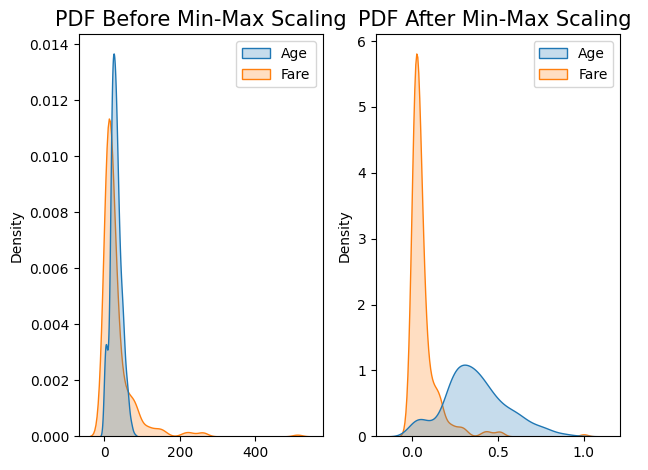

In [25]:
plt.subplot(1, 2, 1)
plt.title("PDF Before Min-Max Scaling", fontsize=15)
sns.kdeplot(data=df, color="blue", fill=True)
plt.subplot(1, 2, 2)
plt.title("PDF After Min-Max Scaling ", fontsize=15)
sns.kdeplot(data=scaled_df, color="red", fill=True)
plt.tight_layout()
plt.show()

 ## Max Absolute Scaling

In [26]:
def max_abs_scaler(data, columns):
    column_stats = {}
    for col in columns:
        col_values = [abs(row[col]) if row[col] is not None else 0 for row in data]  
        column_stats[col] = {'max_abs': max(col_values)}  
    # Apply MaxAbs scaling
    scaled_data = []
    for row in data:
        scaled_row = row.copy()
        for col in columns:
            max_abs = column_stats[col]['max_abs']
            value = row[col] if row[col] is not None else 0  
            # Perform MaxAbs scaling
            if max_abs != 0:  
                scaled_row[col] = value / max_abs
            else:
                scaled_row[col] = 0  
        scaled_data.append(scaled_row)
    
    return scaled_data
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])


data_list = df.to_dict(orient='records')

columns_to_scale = ['Age', 'Fare']

# Perform MaxAbs Scaling
start_time = time.time()
scaled_data = max_abs_scaler(data_list, columns_to_scale)
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Time taken for Max Absolute Scaling: {elapsed_time:.6f} seconds")
scaled_df = pd.DataFrame(scaled_data)

Time taken for Max Absolute Scaling: 0.001834 seconds


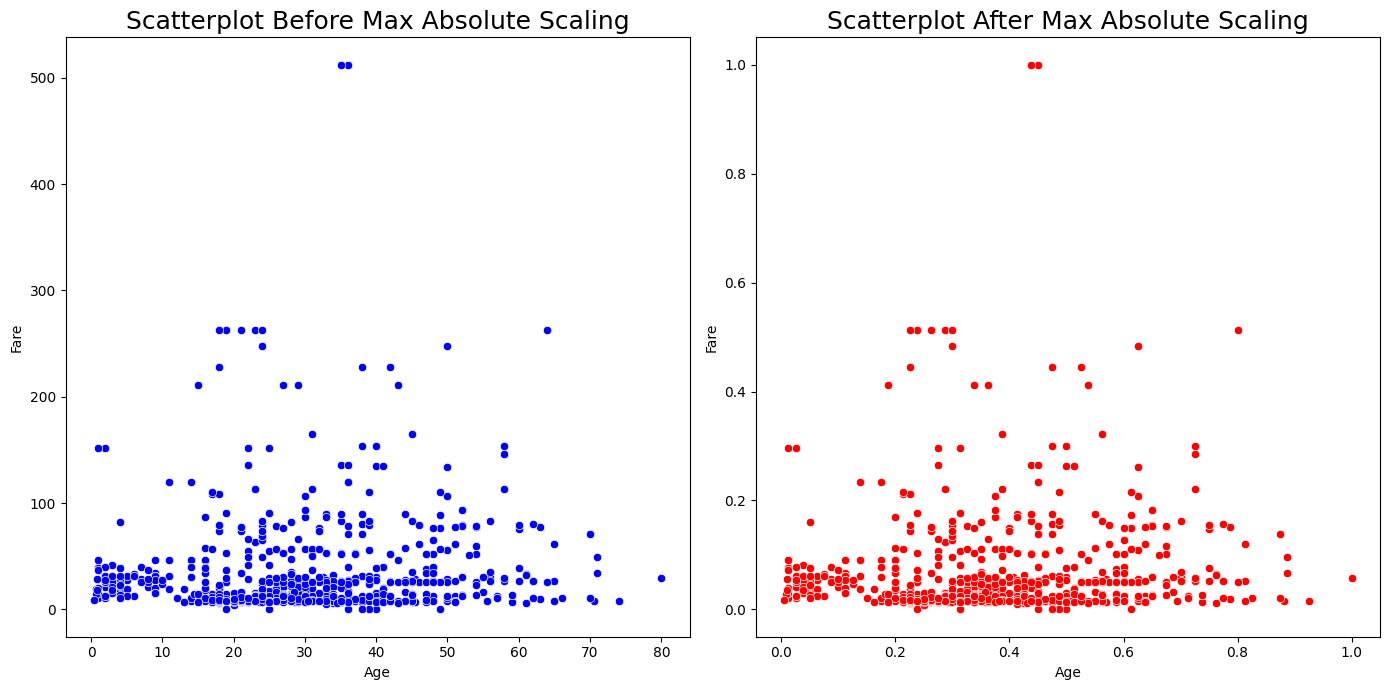

In [27]:

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("Scatterplot Before Max Absolute Scaling", fontsize=18)
sns.scatterplot(x=df['Age'], y=df['Fare'], color="blue")
plt.subplot(1, 2, 2)
plt.title("Scatterplot After Max Absolute Scaling", fontsize=18)
sns.scatterplot(x=scaled_df['Age'], y=scaled_df['Fare'], color="red")
plt.tight_layout()
plt.show()

##  Robust Scaling

In [28]:
def robust_scaler(data, columns):
    column_stats = {}
    for col in columns:
        col_values = [row[col] if row[col] is not None else 0 for row in data]  
        median = sorted(col_values)[len(col_values)//2]  
        sorted_values = sorted(col_values)
        q1 = sorted_values[len(col_values)//4]  
        q3 = sorted_values[(3*len(col_values))//4]  
        iqr = q3 - q1 
        column_stats[col] = {'median': median, 'iqr': iqr}

   # Apply Robust Scaling
    scaled_data = []
    for row in data:
        scaled_row = row.copy()
        for col in columns:
            median = column_stats[col]['median']
            iqr = column_stats[col]['iqr']
            value = row[col] if row[col] is not None else 0  

            if iqr != 0: 
                scaled_row[col] = (value - median) / iqr
            else:
                scaled_row[col] = 0  
        scaled_data.append(scaled_row)
    
    return scaled_data
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])
data_list = df.to_dict(orient='records')

columns_to_scale = ['Age', 'Fare']

start_time = time.time()
scaled_data = robust_scaler(data_list, columns_to_scale)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken for Robust Scaling: {elapsed_time:.6f} seconds")
scaled_df = pd.DataFrame(scaled_data)

Time taken for Robust Scaling: 0.001762 seconds


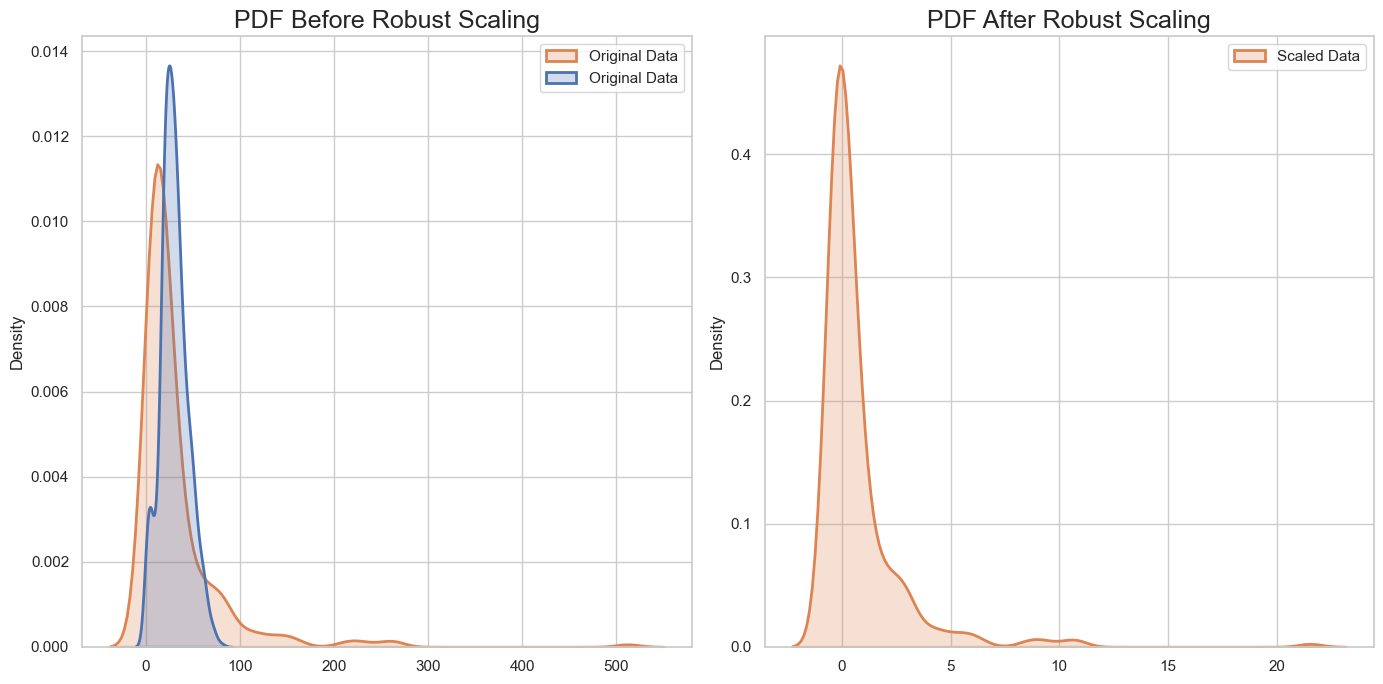

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("PDF Before Robust Scaling", fontsize=18)
sns.kdeplot(data=df, color="blue", shade=True, linewidth=2, label="Original Data")  
plt.legend()
plt.subplot(1, 2, 2)
plt.title("PDF After Robust Scaling", fontsize=18)
sns.kdeplot(data=scaled_df, color="red", shade=True, linewidth=2, label="Scaled Data")  
plt.legend()
plt.tight_layout()
plt.show()


## Standardization Scaling

In [33]:
def standardize(data, columns):
    column_stats = {}
    for col in columns:
        col_values = [row[col] if row[col] is not None else 0 for row in data]
        mean = sum(col_values) / len(col_values) 
        std_dev = (sum((x - mean) ** 2 for x in col_values) / len(col_values)) ** 0.5  
        column_stats[col] = {'mean': mean, 'std_dev': std_dev}

    standardized_data = []
    for row in data:
        standardized_row = row.copy()
        for col in columns:
            mean = column_stats[col]['mean']
            std_dev = column_stats[col]['std_dev']
            value = row[col] if row[col] is not None else 0 
    
            standardized_row[col] = (value - mean) / std_dev if std_dev != 0 else 0
        standardized_data.append(standardized_row)
    
    return standardized_data

# Load dataset
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])
data_list = df.to_dict(orient='records')

columns_to_standardize = ['Age', 'Fare']
start_time = time.time()
standardized_data = standardize(data_list, columns_to_standardize)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken for Standardization: {elapsed_time:.6f} seconds")
standardized_df = pd.DataFrame(standardized_data)

Time taken for Standardization: 0.001776 seconds


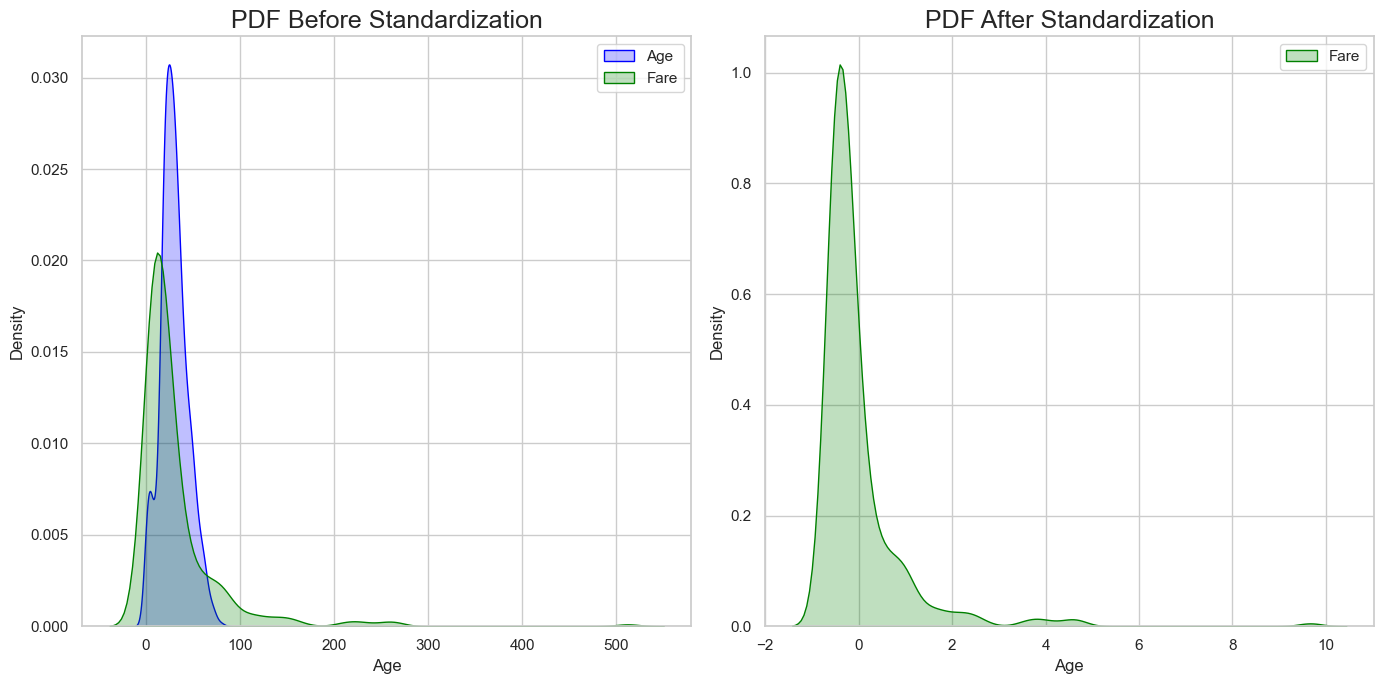

In [39]:
plt.figure(figsize=(14,7))
#Before Standardization
plt.subplot(1, 2, 1)
plt.title("PDF Before Standardization", fontsize=18)
sns.kdeplot(df['Age'], color="blue", shade=True, label="Age")
sns.kdeplot(df['Fare'], color="green", shade=True, label="Fare")
plt.legend()
#After Standardization
plt.subplot(1, 2, 2)
plt.title("PDF After Standardization", fontsize=18)
sns.kdeplot(standardized_df['Age'], color="blue", shade=True, label="Age", warn_singular=False)
sns.kdeplot(standardized_df['Fare'], color="green", shade=True, label="Fare", warn_singular=False)
plt.legend()
plt.tight_layout()
plt.show()

## QuantileTransformer Scaling

In [42]:
import pandas as pd
import time

# Function for Quantile Transformer (Uniform output distribution)
def quantile_transformer(data, columns):
    transformed_data = {}
    
    for col in columns:
        col_values = [row[col] for row in data]  # Extract column values
        sorted_col = sorted(col_values)
        col_quantiles = {val: idx / (len(col_values) - 1) for idx, val in enumerate(sorted_col)}
        
        # Apply transformation based on quantiles
        transformed_data[col] = [col_quantiles[val] for val in col_values]
    
    return pd.DataFrame(transformed_data)

# Load dataset
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])

# Columns to transform
columns_to_transform = ['Age', 'Fare']

# Start timer
start_time = time.time()

# Convert DataFrame to list of dicts (row-wise)
data_list = df.to_dict(orient='records')

# Apply quantile transformation
scaled_df = quantile_transformer(data_list, columns_to_transform)

# End timer
elapsed_time = time.time() - start_time
print(f"Time taken for QuantileTransformer scaling: {elapsed_time:.6f} seconds")




Time taken for QuantileTransformer scaling: 0.004263 seconds


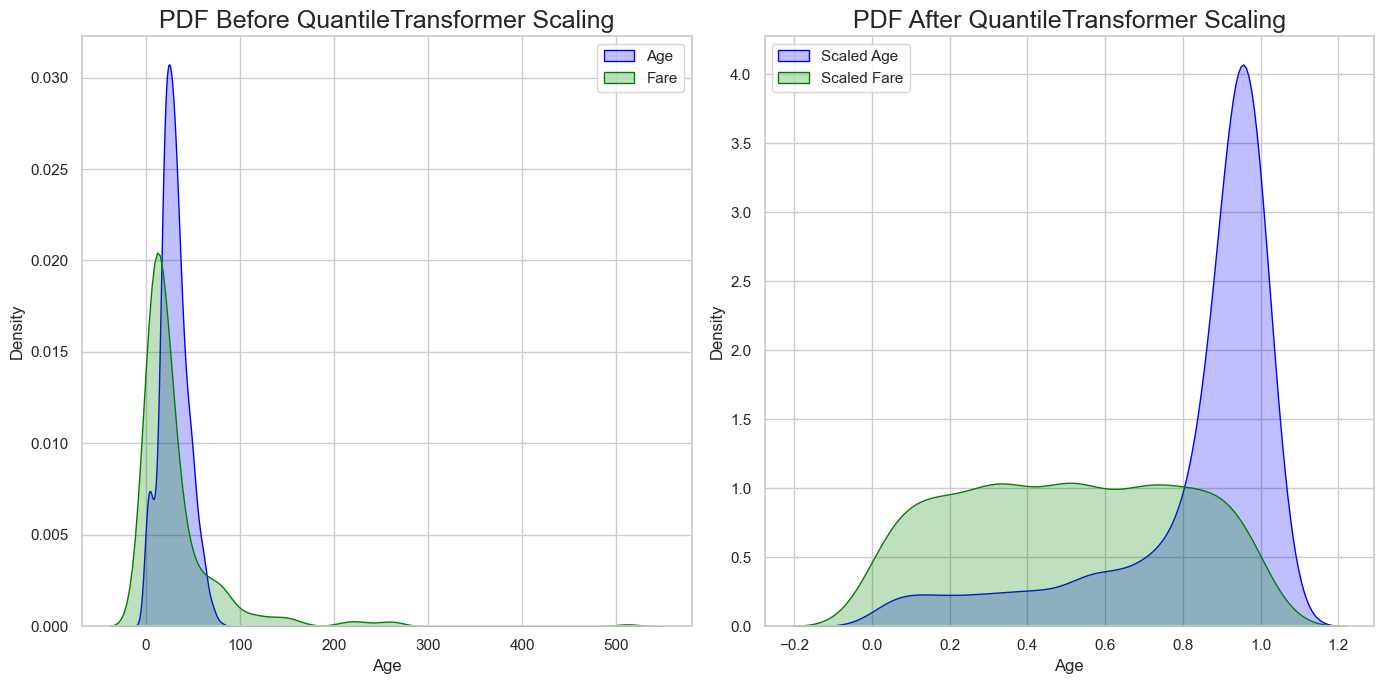

In [44]:
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
plt.title("PDF Before QuantileTransformer Scaling", fontsize=18)
sns.kdeplot(df['Age'], color="blue", label="Age", shade=True)
sns.kdeplot(df['Fare'], color="green", label="Fare", shade=True)
plt.legend()
plt.subplot(1, 2, 2)
plt.title("PDF After QuantileTransformer Scaling", fontsize=18)
sns.kdeplot(scaled_df['Age'], color="blue", label="Scaled Age", shade=True)
sns.kdeplot(scaled_df['Fare'], color="green", label="Scaled Fare", shade=True)
plt.legend()
plt.tight_layout()
plt.show()